In [1]:
import numpy as np
import matplotlib.pyplot as plt

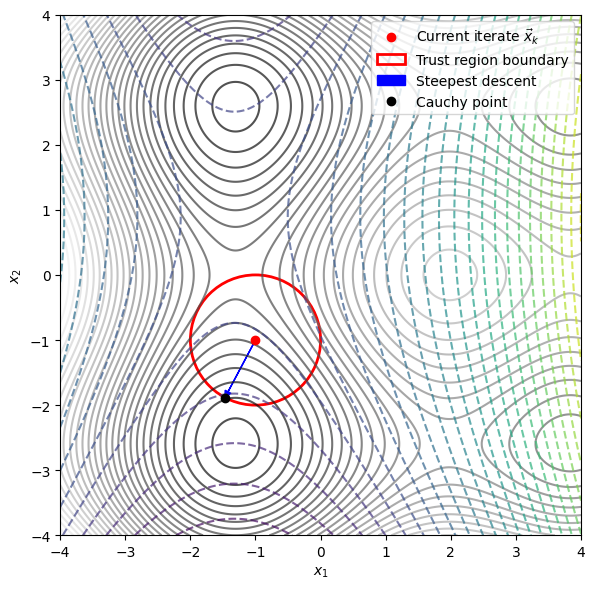

In [2]:
# Define the objective function
def f(x):
    return np.sin(x[0]) + np.cos(x[1]) + 0.1 * (x[0]**2 + x[1]**2)

# Define the gradient of the function
def grad_f(x):
    df_dx1 = np.cos(x[0]) + 0.2 * x[0]
    df_dx2 = -np.sin(x[1]) + 0.2 * x[1]
    return np.array([df_dx1, df_dx2])

# Define the Hessian of the function
def hess_f(x):
    d2f_dx1 = -np.sin(x[0]) + 0.2
    d2f_dx2 = -np.cos(x[1]) + 0.2
    return np.diag([d2f_dx1, d2f_dx2])

# Current iterate and trust region radius
x_k = np.array([-1.0, -1.0])
delta = 1.0

# Compute gradient and Hessian at x_k
g = grad_f(x_k)
H = hess_f(x_k)

# Create a grid of points for plotting
x_vals = np.linspace(-4, 4, 400)
y_vals = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(X) + np.cos(Y) + 0.1 * (X**2 + Y**2)

# Evaluate model on the same grid centered at x_k
PX = X - x_k[0]
PY = Y - x_k[1]
M = f(x_k) + g[0]*PX + g[1]*PY + 0.5*(H[0,0]*PX**2 + H[1,1]*PY**2)

# Compute Cauchy point 
g_norm = np.linalg.norm(g)
p_cauchy = -(delta / g_norm) * g if g_norm > 0 else np.zeros_like(g)
cauchy_point = x_k + p_cauchy

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
obj_contours = ax.contour(X, Y, Z, levels=30, cmap='gray', linestyles='solid', alpha=0.7)
model_contours = ax.contour(X, Y, M, levels=30, cmap='viridis', linestyles='dashed', alpha=0.7)

# Current iterate
ax.plot(x_k[0], x_k[1], 'ro', label='Current iterate $\\vec{x}_k$')

# Trust region circle
circle = plt.Circle((x_k[0], x_k[1]), delta, color='red', fill=False, linewidth=2, label='Trust region boundary')
ax.add_patch(circle)

# Steepest descent direction and Cauchy point
ax.arrow(x_k[0], x_k[1], p_cauchy[0], p_cauchy[1], 
         head_width=0.1, head_length=0.1, fc='blue', ec='blue', length_includes_head=True, label='Steepest descent')
ax.plot(cauchy_point[0], cauchy_point[1], 'ko', label='Cauchy point')

# Labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.legend(loc='upper right')
plt.tight_layout()

plt.savefig('figures/trust_region.pdf')